In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

import kagglehub

from tensorflow.keras.layers import Conv2D, BatchNormalization, ReLU, AveragePooling2D, Input, Concatenate


In [ ]:
path = kagglehub.dataset_download("anshtanwar/pets-facial-expression-dataset")

print("Path to dataset files:", path)

path_2 = os.path.join(path, "Master Folder")

train_dir = os.path.join(path, "Master Folder", "train")
val_dir = os.path.join(path, "Master Folder", "valid")
test_dir = os.path.join(path, "Master Folder", "test")

c:\Users\Seif\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\Seif\.cache\kagglehub\datasets\anshtanwar\pets-facial-expression-dataset\versions\11


In [ ]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    fill_mode='nearest'
)

test_val_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

val_gen = test_val_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_gen = test_val_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=1,
    class_mode='categorical',
    shuffle=False
)


Found 1000 images belonging to 4 classes.
Found 36 images belonging to 4 classes.
Found 38 images belonging to 4 classes.


In [ ]:
from tensorflow.keras.applications import DenseNet121

# Builtin Model for Comparison
builtin_model = DenseNet121(weights=None, input_shape=(224, 224, 3), classes=4)
builtin_model.summary()


Model: "densenet121"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_12      │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_18   │ (None, 230, 230,  │          0 │ input_layer_12[0… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,408 │ zero_padding2d_1… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_19   │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1               │ (None, 56, 56,    │          0 │ zero_padding2d_1… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │        256 │ pool1[0][0]       │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_relu │ (None, 56, 56,    │          0 │ conv2_block1_0_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      8,192 │ conv2_block1_0_r… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        512 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,864 │ conv2_block1_1_r… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_concat │ (None, 56, 56,    │          0 │ pool1[0][0],      │
│ (Concatenate)       │ 96)               │            │ conv2_block1_2_c… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_bn   │ (None, 56, 56,    │        384 │ conv2_block1_con… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_relu │ (None, 56, 56,    │          0 │ conv2_block2_0_b… │
│ (Activation)        │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_1_conv │ (None, 56, 56,    │     12,288 │ conv2_block2_0_r

 Total params: 7,041,604 (26.86 MB)

 Trainable params: 6,957,956 (26.54 MB)

 Non-trainable params: 83,648 (326.75 KB)

In [ ]:
def conv_block(x, growth_rate):
    # Bottleneck layer: BN-ReLU-1x1 Conv
    x1 = BatchNormalization()(x)
    x1 = ReLU()(x1)
    x1 = Conv2D(4 * growth_rate, kernel_size=1, strides=1, padding='same', use_bias=False)(x1)
    
    # BN-ReLU-3x3 Conv
    x1 = BatchNormalization()(x1)
    x1 = ReLU()(x1)
    x1 = Conv2D(growth_rate, kernel_size=3, strides=1, padding='same', use_bias=False)(x1)
    
    # Concatenate with input (dense connection)
    x = Concatenate()([x, x1])
    return x

def dense_block(x, num_layers, growth_rate):
    for _ in range(num_layers):
        x = conv_block(x, growth_rate)
    return x

def transition_layer(x, compression=0.5):
    # BN-ReLU-1x1 Conv
    x = BatchNormalization()(x)
    x = ReLU()(x)
    out_channels = int(tf.keras.backend.int_shape(x)[-1] * compression)
    x = Conv2D(out_channels, kernel_size=1, strides=1, padding='same', use_bias=False)(x)
    x = AveragePooling2D(pool_size=3, strides=2, padding='same')(x)
    return x

def DenseNet121_Custom(input_shape=(224, 224, 3), num_classes=7, growth_rate=32):
    # Configuration from paper: 6, 12, 24, 16
    block_config = [6, 12, 24, 16]

    inputs = Input(shape=input_shape)

    # Initial Convolution and Pooling
    x = Conv2D(64, kernel_size=7, strides=2, padding='same', use_bias=False)(inputs)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = AveragePooling2D(pool_size=3, strides=2, padding='same')(x)

    # Dense Blocks with Transition Layers
    for i in range(len(block_config)):
        x = dense_block(x, block_config[i], growth_rate)
        if i != len(block_config) - 1:
            x = transition_layer(x)

    # Final BN, ReLU, Global Pooling
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = GlobalAveragePooling2D()(x)

    # Classification layer
    outputs = Dense(num_classes, activation='softmax')(x)

    return Model(inputs, outputs, name="DenseNet121_custom")


In [42]:
model = DenseNet121_Custom(input_shape=(224, 224, 3), num_classes=4)
model.summary()

Model: "DenseNet121_custom"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_16      │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_720 (Conv2D) │ (None, 112, 112,  │      9,408 │ input_layer_16[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 112, 112,  │        256 │ conv2d_720[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_726 (ReLU)    │ (None, 112, 112,  │          0 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ average_pooling2d_… │ (None, 56, 56,    │          0 │ re_lu_726[0][0]   │
│ (AveragePooling2D)  │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 56, 56,    │        256 │ average_pooling2… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_727 (ReLU)    │ (None, 56, 56,    │          0 │ batch_normalizat… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_721 (Conv2D) │ (None, 56, 56,    │      8,192 │ re_lu_727[0][0]   │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 56, 56,    │        512 │ conv2d_721[0][0]  │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_728 (ReLU)    │ (None, 56, 56,    │          0 │ batch_normalizat… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_722 (Conv2D) │ (None, 56, 56,    │     36,864 │ re_lu_728[0][0]   │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_348     │ (None, 56, 56,    │          0 │ average_pooling2… │
│ (Concatenate)       │ 96)               │            │ conv2d_722[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 56, 56,    │        384 │ concatenate_348[… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_729 (ReLU)    │ (None, 56, 56,    │          0 │ batch_normalizat… │
│                     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_723 (Conv2D) │ (None, 56, 56,    │     12,288 │ re_lu_729[0][0]   │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 56, 56,    │        512 │ conv2d_723[0][0]  │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_730 (ReLU)    │ (None, 56, 56,    │          0 │ batch_normalizat

 Total params: 7,041,604 (26.86 MB)

 Trainable params: 6,957,956 (26.54 MB)

 Non-trainable params: 83,648 (326.75 KB)

In [ ]:
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [45]:
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=20
)

32/32 ━━━━━━━━━━━━━━━━━━━━ 228s 7s/step - accuracy: 0.5538 - loss: 1.0199 - val_accuracy: 0.1944 - val_loss: 1.6772
Epoch 13/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 228s 7s/step - accuracy: 0.6420 - loss: 0.9230 - val_accuracy: 0.1944 - val_loss: 1.7026
Epoch 14/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 206s 6s/step - accuracy: 0.5981 - loss: 0.9230 - val_accuracy: 0.1667 - val_loss: 1.8067
Epoch 15/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 203s 6s/step - accuracy: 0.6407 - loss: 0.8781 - val_accuracy: 0.1667 - val_loss: 1.7533
Epoch 16/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 253s 8s/step - accuracy: 0.6438 - loss: 0.9009 - val_accuracy: 0.3056 - val_loss: 1.8219
Epoch 17/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 201s 6s/step - accuracy: 0.6466 - loss: 0.8486 - val_accuracy: 0.2778 - val_loss: 1.7540
Epoch 18/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 213s 7s/step - accuracy: 0.6921 - loss: 0.7815 - val_accuracy: 0.3611 - val_loss: 1.8096
Epoch 19/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 236s 7s/step - accuracy: 0.7019 - loss: 0.7739 - val_accuracy: 0.3333 - val_l

c:\Users\Seif\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 88ms/step
              precision    recall  f1-score   support

       Angry     0.3333    0.3000    0.3158        10
       Other     0.1111    0.1667    0.1333         6
         Sad     0.1250    0.1818    0.1481        11
       happy     0.2500    0.0909    0.1333        11

    accuracy                         0.1842        38
   macro avg     0.2049    0.1848    0.1827        38
weighted avg     0.2138    0.1842    0.1856        38



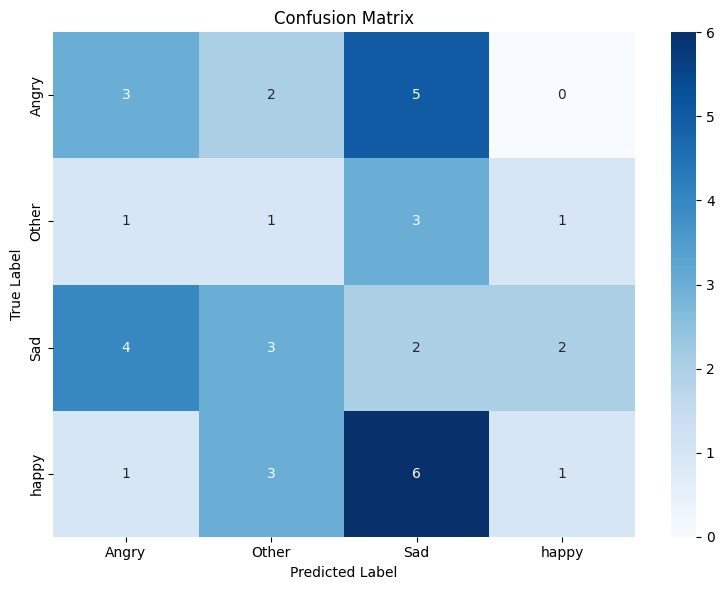

In [46]:
y_pred_probs = model.predict(test_gen)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = test_gen.classes
class_names = list(test_gen.class_indices.keys())

report = classification_report(y_true, y_pred, target_names=class_names, digits=4)
print(report)

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()
